In [6]:
import sklearn.linear_model

In [7]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot

In [8]:
trains = pd.read_csv('../data/sydtrains.csv', thousands=',', index_col='STATION')

In [9]:
trains2014 = trains[trains.YEAR == 2014]
trains2014.columns

Index([u'LINE', u'YEAR', u'SURVEY_DATE_USED', u'WHETHER_SURVEYED',
       u'IN_0200_0600', u'OUT_0200_0600', u'IN_0600_0930', u'OUT_0600_0930',
       u'IN_0930_1500', u'OUT_0930_1500', u'IN_1500_1830', u'OUT_1500_1830',
       u'IN_1830_0200', u'OUT_1830_0200', u'IN_24_HOURS', u'OUT_24_HOURS',
       u'RANK', u'STATION_SORT_ID'],
      dtype='object')

In [10]:
scatter_data_in = trains2014.loc[ : , ['IN_1500_1830' , 'IN_1830_0200', 'OUT_0600_0930']]

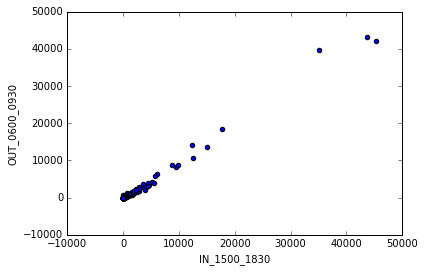

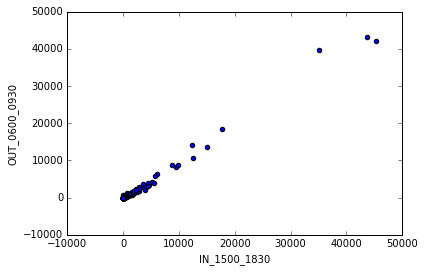

In [11]:
trains2014.loc[ : , ['IN_1500_1830' , 'IN_1830_0200', 'OUT_0600_0930']].plot(kind='scatter', x='IN_1500_1830', y = 'OUT_0600_0930')
trains2014.loc[ : , ['IN_1500_1830' , 'IN_1830_0200', 'OUT_0600_0930']].plot(kind='scatter', x='IN_1500_1830', y = 'OUT_0600_0930')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x103d787d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x118e1e6d0>]], dtype=object)

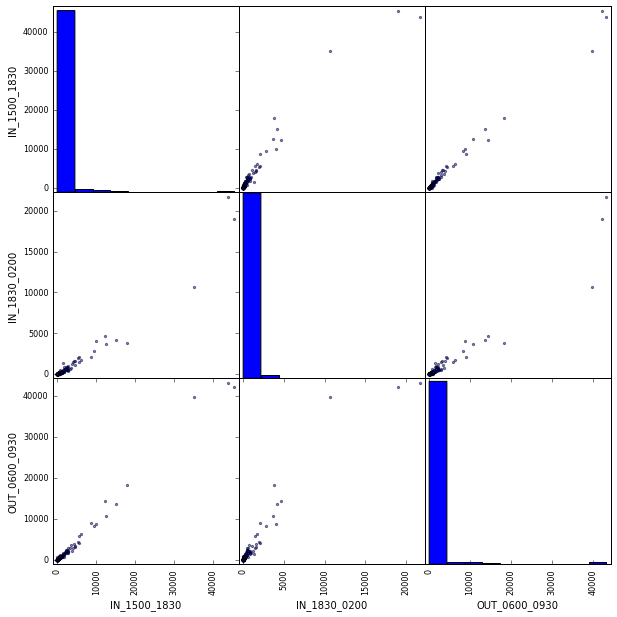

In [12]:
pd.scatter_matrix(scatter_data_in, figsize=(10,10))

In [16]:
getoff_am = trains2014.loc[ : , ['OUT_0600_0930', 'OUT_0930_1500']] #gets this column as a dataframe
getin_pm = trains2014.IN_1500_1830 #this gets it as a series

In [17]:
regressor = sklearn.linear_model.RANSACRegressor(max_trials=1000)

In [18]:
regressor.fit(getoff_am, getin_pm)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        max_trials=1000, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [19]:
predictions_pm = regressor.predict(getoff_am) #test the regressor against original data to see how it matches up

In [38]:
predictions_pm

array([  4.89806356e+04,   5.03076440e+04,   4.61287316e+04,
         1.59567512e+04,   2.13579082e+04,   1.24529835e+04,
         9.55451776e+03,   5.07295432e+03,   4.72374159e+03,
         1.01947411e+04,   1.65969746e+04,   2.57026305e+03,
         1.03693475e+04,   3.93219272e+03,   3.42001404e+03,
         4.45601183e+03,   2.64010560e+03,   2.34909499e+03,
         3.46657574e+03,   1.89511843e+03,   2.09300565e+03,
         7.33119668e+03,   1.84855674e+03,   3.75758635e+03,
         6.85393927e+03,   9.17322775e+02,   1.25489509e+03,
         2.11628650e+03,   2.65174603e+03,   1.70887164e+03,
         1.54590570e+03,   2.88455452e+03,   1.93003971e+03,
         8.47480228e+02,   2.15120777e+03,   4.16500121e+03,
         1.03372702e+03,   2.46549923e+03,   1.53426527e+03,
         8.00918530e+02,   1.21997381e+03,   2.70994815e+03,
         1.77871419e+03,   1.30145678e+03,   1.24325466e+03,
         1.08028872e+03,   3.38509277e+03,   1.17341211e+03,
         2.01152268e+03,

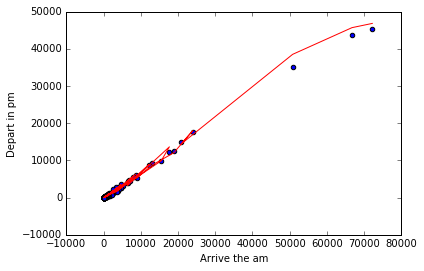

In [23]:
#draw the original data points
matplotlib.pyplot.scatter(trains2014.OUT_0600_0930 + trains2014.OUT_0930_1500, trains2014.IN_1500_1830)
#draw the prediction as a line to see how good the regression was
matplotlib.pyplot.plot(trains2014.OUT_0600_0930 + trains2014.OUT_0930_1500, predictions_pm, color = 'red')
matplotlib.pyplot.xlabel('Arrive the am')
matplotlib.pyplot.ylabel('Depart in pm')

In [24]:
regressor.estimator_ #returns a linear regression object

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
#gets the gradient of the line
regressor.estimator_.coef_ 
#for every passenger that gets out of a train station in the morning, 1.16 passengers get in the afternoon

array([ 0.88059453,  0.32463789])

In [22]:
regressor.estimator_.intercept_
#finds y where x is 0

-9.4809454927762999